In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

In [42]:
cab = pd.read_csv('cab_weather.csv')

In [43]:
city = pd.read_csv('city_weather.csv')

In [44]:
city['atemp'] = city[['tmin', 'tmax']].mean(axis=1)

In [45]:
main = pd.merge(city,cab,on='atemp',how='inner')

In [46]:
main

,time,tmin,tmax,prcp,city-Name,target,atemp,s.no,datetime,season,holiday,workingday,weather,temp,humidity,windspeed
0,1990-08-01,22.0,28.0,0.5,Chennai,28.5,25.00,0,05/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,48,35.0008
1,1990-08-01,22.0,28.0,0.5,Chennai,28.5,25.00,93,11/09/2011 16:00,Winter,0,1,Clear + Few clouds,21.32,48,12.9980
2,1990-08-01,22.0,28.0,0.5,Chennai,28.5,25.00,178,09/10/2011 02:00,Fall,0,0,Mist + Cloudy,24.60,97,7.0015
3,1990-08-01,22.0,28.0,0.5,Chennai,28.5,25.00,193,05/02/2012 20:00,Summer,0,1,Clear + Few clouds,21.32,77,16.9979
4,1990-08-01,22.0,28.0,0.5,Chennai,28.5,25.00,230,9/19/2012 6:00,Fall,0,1,Clear + Few clouds,21.32,63,16.9979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152930,2004-04-01,5.0,14.7,0.0,Delhi,13.5,9.85,8186,02/09/2012 07:00,Spring,0,1,Clear + Few clouds,8.20,69,16.9979
152931,2004-04-01,5.0,14.7,0.0,Delhi,13.5,9.85,8409,01/08/2011 04:00,Spring,0,0,"Light Snow, Light Rain",7.38,55,11.0014
152932,2004-04-01,5.0,14.7,0.0,Delhi,13.5,9.85,8485,1/16/2011 19:00,Spring,0,0,Clear + Few clouds,7.38,47,8.9981
152933,2004-04-01,5.0,14.7,0.0,Delhi,13.5,9.85,8615,12/19/2011 8:00,Winter,0,1,Clear + Few clouds,8.20,75,12.9980


In [47]:
main_2 = main.drop(['time','datetime','s.no'],axis=1)

In [48]:
main_2

,tmin,tmax,prcp,city-Name,target,atemp,season,holiday,workingday,weather,temp,humidity,windspeed
0,22.0,28.0,0.5,Chennai,28.5,25.00,Summer,0,1,Clear + Few clouds,21.32,48,35.0008
1,22.0,28.0,0.5,Chennai,28.5,25.00,Winter,0,1,Clear + Few clouds,21.32,48,12.9980
2,22.0,28.0,0.5,Chennai,28.5,25.00,Fall,0,0,Mist + Cloudy,24.60,97,7.0015
3,22.0,28.0,0.5,Chennai,28.5,25.00,Summer,0,1,Clear + Few clouds,21.32,77,16.9979
4,22.0,28.0,0.5,Chennai,28.5,25.00,Fall,0,1,Clear + Few clouds,21.32,63,16.9979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152930,5.0,14.7,0.0,Delhi,13.5,9.85,Spring,0,1,Clear + Few clouds,8.20,69,16.9979
152931,5.0,14.7,0.0,Delhi,13.5,9.85,Spring,0,0,"Light Snow, Light Rain",7.38,55,11.0014
152932,5.0,14.7,0.0,Delhi,13.5,9.85,Spring,0,0,Clear + Few clouds,7.38,47,8.9981
152933,5.0,14.7,0.0,Delhi,13.5,9.85,Winter,0,1,Clear + Few clouds,8.20,75,12.9980


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
encoder = LabelEncoder()

In [51]:
main_2['city_e']=encoder.fit_transform(main_2['city-Name'])
main_2['season_e']=encoder.fit_transform(main_2['season'])
main_2['weather_e']=encoder.fit_transform(main_2['weather'])

In [52]:
main_2 = main_2.drop(['city-Name','season','weather'],axis=1)

In [54]:
X=main_2.drop(['prcp'],axis =1)
y = main['prcp']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()

In [59]:
model.fit(X_train,y_train)

LinearRegression()

In [60]:
test_predictions = model.predict(X_test)

In [61]:
test_predictions

array([ 4.89741496,  3.17778691, -1.50657013, ..., -1.30118147,
        2.56295477,  5.52196118])

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [64]:
RMSE

11.434701846029974

<AxesSubplot:ylabel='Count'>

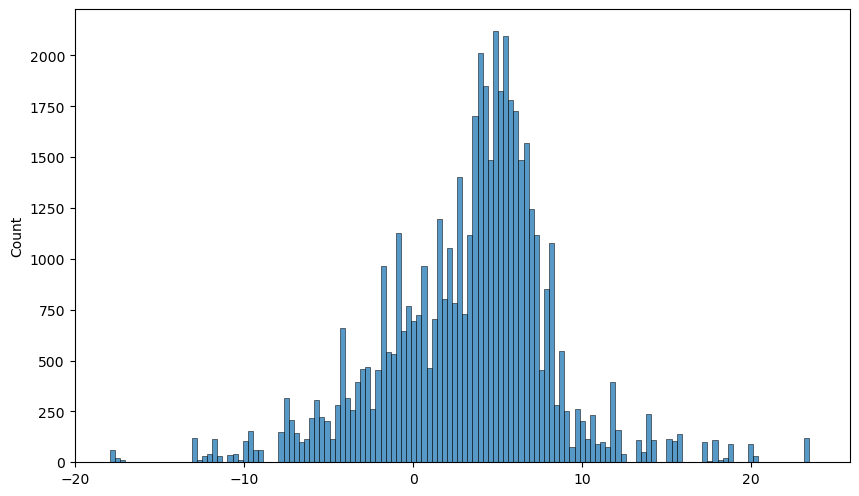

In [65]:
pt.figure(figsize=(10,6),dpi=100)
sns.histplot(test_predictions)

In [66]:
from scipy import stats
mu, std = stats.norm.fit(test_predictions)
mu, std

(3.347910434336725, 4.971522460083138)

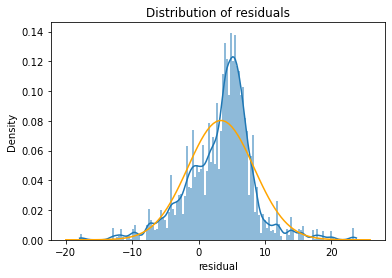

In [67]:
fig, ax = pt.subplots()
sns.histplot(x=test_predictions, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")


xmin, xmax = pt.xlim()
x = np.linspace(xmin, xmax, 100) 
p = stats.norm.pdf(x, mu, std) 
sns.lineplot(x=x, y=p, color="orange", ax=ax)
pt.show()